# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [1]:
# Import the numpy and pandas package
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Read the given CSV file, and view some sample records
df = pd.read_csv("clean_metabric.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1517 non-null   int64  
 1   age_at_diagnosis                1517 non-null   float64
 2   type_of_breast_surgery          1517 non-null   object 
 3   cancer_type                     1517 non-null   object 
 4   cancer_type_detailed            1517 non-null   object 
 5   cellularity                     1517 non-null   object 
 6   chemotherapy                    1517 non-null   int64  
 7   pam50_claudin_low_subtype       1517 non-null   object 
 8   cohort                          1517 non-null   float64
 9   estrogen_status                 1517 non-null   object 
 10  neoplasm_histologic_grade       1517 non-null   float64
 11  her2_status                     1517 non-null   object 
 12  tumor_other_histologic_subtype  15

In [3]:
df.head()

,Unnamed: 0,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_claudin_low_subtype,cohort,estrogen_status,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,progesterone_status,radio_therapy,3-gene_classifier_subtype,tumor_size,death_from_cancer,overall_survival_years
0,1,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positive,...,4.02,IDC,84.63,1,Positive,1,ER+/HER2- High Prolif,10.0,Living,7
1,4,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positive,...,6.08,MDLC,41.37,0,Positive,1,ER+/HER2- High Prolif,40.0,Died of Disease,3
2,5,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positive,...,4.06,IDC,7.80,0,Positive,1,ER+/HER2- High Prolif,31.0,Died of Disease,1
3,8,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positive,...,5.03,IDC,36.57,0,Negative,1,ER+/HER2- High Prolif,16.0,Died of Other Causes,3
4,9,84.22,MASTECTOMY,Breast Cancer,Breast Invasive Lobular Carcinoma,High,0,Her2,1.0,Positive,...,3.06,ILC,36.27,0,Negative,0,ER+/HER2- High Prolif,28.0,Died of Disease,3


In [4]:
df.describe()

,Unnamed: 0,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,overall_survival,radio_therapy,tumor_size,overall_survival_years
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,992.448912,61.070778,0.205010,2.698748,2.417930,0.620962,1.998682,5.666447,4.119868,124.594931,0.430455,0.593276,26.356717,10.390244
std,546.450100,12.985959,0.403842,1.221328,0.647215,0.485307,3.941525,3.695824,1.064267,75.140691,0.495303,0.491384,15.322138,6.279599
min,1.000000,21.930000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2.000000,0.100000,0.000000,0.000000,1.000000,0.000000
25%,520.000000,51.420000,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,3.050000,60.670000,0.000000,0.000000,17.000000,5.000000
50%,1033.000000,61.720000,0.000000,3.000000,3.000000,1.000000,0.000000,5.000000,4.050000,115.630000,0.000000,1.000000,23.000000,10.000000
75%,1463.000000,70.610000,0.000000,3.000000,3.000000,1.000000,2.000000,7.000000,5.040000,185.000000,1.000000,1.000000,30.000000,15.000000
max,1903.000000,96.290000,1.000000,5.000000,3.000000,1.000000,41.000000,46.000000,6.360000,337.030000,1.000000,1.000000,182.000000,28.000000


## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

C:\Users\snigd\anaconda3\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


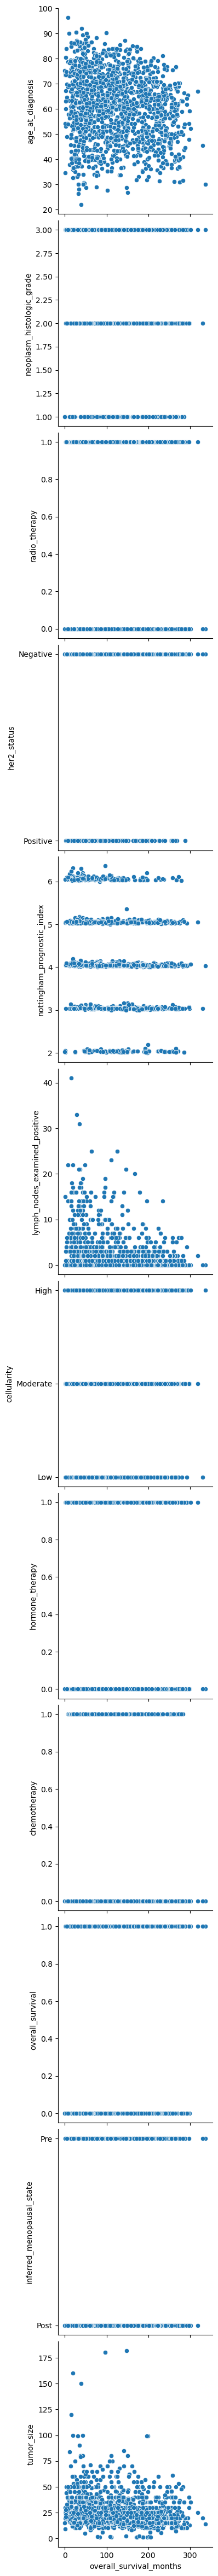

In [5]:
sns.pairplot(df, y_vars=['age_at_diagnosis', 'neoplasm_histologic_grade','radio_therapy','her2_status', 'nottingham_prognostic_index',
                               'lymph_nodes_examined_positive','cellularity', 'hormone_therapy','chemotherapy',
                               'overall_survival','inferred_menopausal_state', 'tumor_size' ],
                x_vars='overall_survival_months', size=4,aspect=1, kind='scatter')

In [6]:
# Age at diagnosis and lymph nodes examined seem to have a negative correlation with survival months

In [7]:
df_Cor = df[['age_at_diagnosis', 'neoplasm_histologic_grade','radio_therapy', 'nottingham_prognostic_index',
                               'lymph_nodes_examined_positive', 'hormone_therapy','chemotherapy',
                               'overall_survival', 'overall_survival_months', 'tumor_size']].copy()

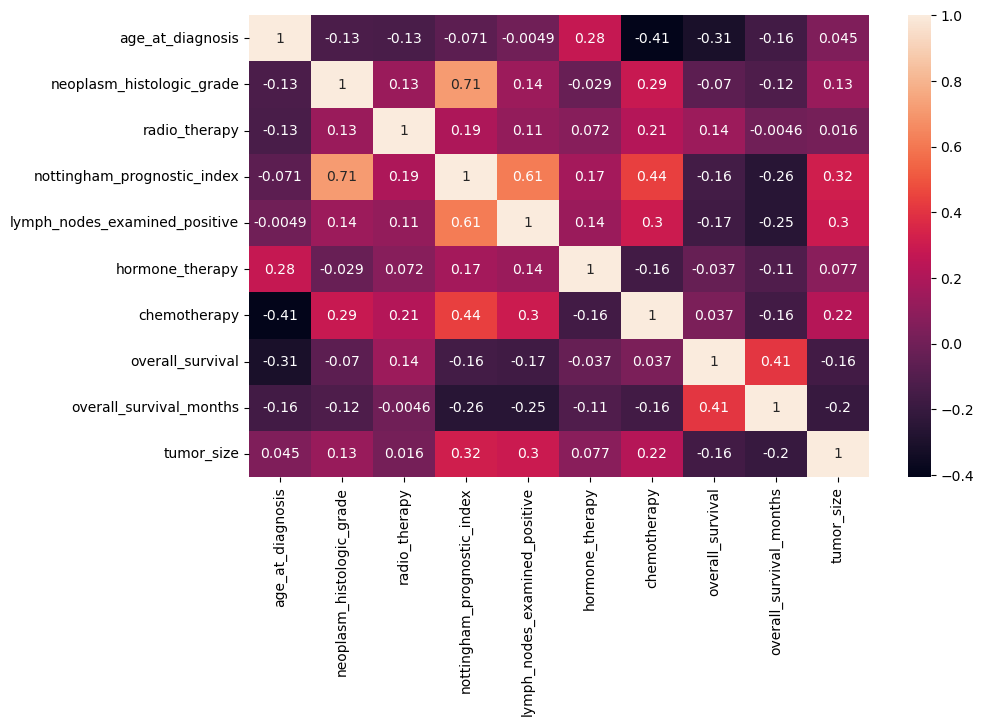

In [8]:
corr = df_Cor.corr()
sns.heatmap(corr, annot=True).figure.set_size_inches(10, 6)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [9]:
X=df['lymph_nodes_examined_positive']
y=df['overall_survival_months']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                            test_size = 0.3, random_state = 100)

In [11]:
X_test.head()

1298     9.0
1409     1.0
249      0.0
1342     0.0
1503    33.0
Name: lymph_nodes_examined_positive, dtype: float64

In [12]:
X_train.head()

1401    0.0
306     1.0
355     1.0
474     1.0
963     0.0
Name: lymph_nodes_examined_positive, dtype: float64

In [13]:
y_test.head()

1298    80.37
1409    29.90
249     71.50
1342    86.40
1503    28.87
Name: overall_survival_months, dtype: float64

In [14]:
y_train.head()

1401     64.70
306     121.97
355     280.70
474      32.03
963     153.53
Name: overall_survival_months, dtype: float64

In [15]:
import statsmodels.api as sm

#adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

#fitting the regression line using 'OLS' regression function - model now lives in the variable 'lr'
lr = sm.OLS(y_train, X_train_sm).fit()

#printing the parameters
lr.params

const                            134.025279
lymph_nodes_examined_positive     -4.655022
dtype: float64

In [16]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     overall_survival_months   R-squared:                       0.061
Model:                                 OLS   Adj. R-squared:                  0.060
Method:                      Least Squares   F-statistic:                     68.49
Date:                     Tue, 17 Oct 2023   Prob (F-statistic):           3.80e-16
Time:                             00:23:12   Log-Likelihood:                -6047.1
No. Observations:                     1061   AIC:                         1.210e+04
Df Residuals:                         1059   BIC:                         1.211e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           134.0253      2.490     53.817      0.000     129.139     138.912
lymph_nodes_examined_positive    -4.6550      0.562     -8.276      0.000      -5.759      -3.551
==============================================================================
Omnibus:                      114.158   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.174
Skew:                           0.331   Prob(JB):                     2.10e-11
Kurtosis:                       2.178   Cond. No.                         5.02
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

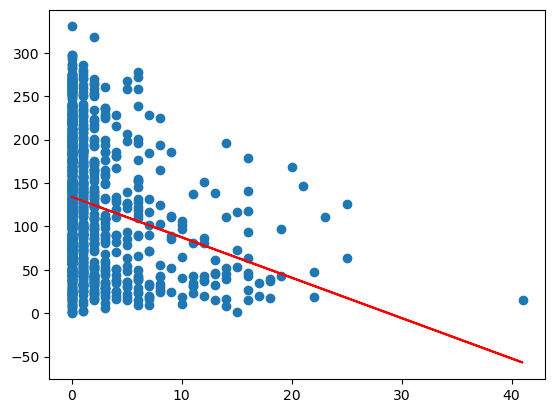

In [17]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 134.0253 -4.6550*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [ ]:
#Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

#Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

#plot data
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.061
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? Not so much as The R-squared value is less than 0.8 and the p value is more than the coefficient.
3. Was your plot of the error terms a bell curve? Yes